In [77]:
!pip install jupyterthemes
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('grade3')

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid

In [63]:
#load dataset
df = pd.read_csv("cryptodata/btc_reddit.csv")
df
#Drop irrelevant columns
df = df.drop(['cryptoId','start','duration','open', 'high', 'low', 'source', 'count', 'average', 'std', 'positive', 'negative'], axis=1)

In [64]:
#labeling function: 1=BUY, 0=HOLD, -1=SELL
def label(x):
    if x > 0.03: 
        return 2 #BUY
    elif x < -0.04: 
        return 0 #SELL`
    else:
        return 1 #HOLD

In [65]:
# Add the following feature columns:

#'7_day_score' = 7 day moving average of sentiment score
#'7_day_score_pct' = 7 day percentage change of score's moving average
df['7_day_score'] =  df['score'].rolling(window=7).mean()
df['7_day_score_pct'] = df['7_day_score'].pct_change(periods=7)


#'5_day_moving_average_pct_change'
#'20_day_moving_average_pct_change'
df['5_day_moving_average'] = df['close'].rolling(window=5).mean()
df['20_day_moving_average'] = df['close'].rolling(window=20).mean()
df['5_day_moving_average_pct_change'] = df['5_day_moving_average'].pct_change(periods=5)
df['20_day_moving_average_pct_change'] = df['5_day_moving_average'].pct_change(periods=20)

#Apply the labels
df['7_day_future_price_change'] = df['close'].pct_change(periods=-10)
df['label'] = df['7_day_future_price_change'].apply(label)

#Drop columns that won't be used as inputs
df = df.drop(['5_day_moving_average', '20_day_moving_average', 'close', '7_day_future_price_change'], axis=1)
#Drop nan values
df.dropna(inplace=True)

In [66]:
dataloader = pd.DataFrame(df)

#splitting the data into input features and target label
features = dataloader.drop('label', axis=1)
target = dataloader['label']

In [67]:
# Split into train+val and test
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, target, 
                                        test_size=0.33, random_state=69, shuffle=True)



In [68]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [69]:
y_pred_knn = knn.predict(X_test_knn)

In [70]:
print(classification_report(y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

           0       0.36      0.42      0.39        43
           1       0.37      0.38      0.37        40
           2       0.27      0.20      0.23        30

    accuracy                           0.35       113
   macro avg       0.33      0.33      0.33       113
weighted avg       0.34      0.35      0.34       113



<AxesSubplot:>

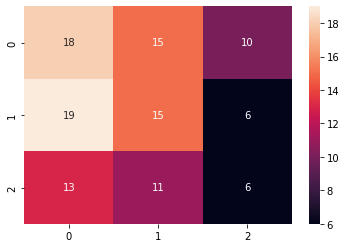

In [71]:
confusion_matrix_df_knn = pd.DataFrame(confusion_matrix(y_test_knn, y_pred_knn))

sns.heatmap(confusion_matrix_df_knn, annot=True)

In [72]:
X_train_NC, X_test_NC, y_train_NC, y_test_NC = train_test_split(features, target, test_size = 0.33, shuffle = True, random_state = 0)

In [73]:
# Creating the Nearest Centroid Classifier
model = NearestCentroid()
# Training the classifier
model.fit(X_train_NC, y_train_NC.values.ravel())

NearestCentroid()

In [74]:
y_pred_NC = model.predict(X_test_NC)

In [75]:
print(classification_report(y_test_NC, y_pred_NC))

              precision    recall  f1-score   support

           0       0.42      0.69      0.52        45
           1       0.38      0.10      0.16        30
           2       0.45      0.37      0.41        38

    accuracy                           0.42       113
   macro avg       0.42      0.39      0.36       113
weighted avg       0.42      0.42      0.39       113



<AxesSubplot:>

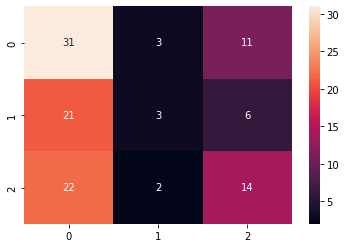

In [76]:
confusion_matrix_df_NC = pd.DataFrame(confusion_matrix(y_test_NC, y_pred_NC))

sns.heatmap(confusion_matrix_df_NC, annot=True)